hat is the overall on-time performance, and what do the overall distributions of adherence and headway deviation look like? 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# import the ones we think we need or find out we need later



In [3]:

# get the data
wego = pd.read_csv(r"C:\Users\Brian\OneDrive\Desktop\DA12\projects\Python\wego-python-da12-pumpkin-py-latte\data\Headway Data, 8-1-2023 to 9-30-2023.csv")
# investigate the data
wego.head()


,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0


Notes: ok fun like real world data. why do we have NaN's fore headway dev and layover minutes that going to mess with me isn't it. if i remove it do i care?...


In [5]:


wego.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350329 entries, 0 to 350328
Data columns (total 30 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   CALENDAR_ID                350329 non-null  int64  
 1   SERVICE_ABBR               350329 non-null  int64  
 2   ADHERENCE_ID               350329 non-null  int64  
 3   DATE                       350329 non-null  object 
 4   ROUTE_ABBR                 350329 non-null  int64  
 5   BLOCK_ABBR                 350329 non-null  int64  
 6   OPERATOR                   350329 non-null  int64  
 7   TRIP_ID                    350329 non-null  int64  
 8   OVERLOAD_ID                350329 non-null  int64  
 9   ROUTE_DIRECTION_NAME       350329 non-null  object 
 10  TIME_POINT_ABBR            350329 non-null  object 
 11  ROUTE_STOP_SEQUENCE        350318 non-null  float64
 12  TRIP_EDGE                  350329 non-null  int64  
 13  LATITUDE                   35

Notes: neat bunch of data. I can reasonably say that I'll be confident if my math comes through we've definitely got a bunch of NaN's and I don't like it!


In [7]:
print(wego.isna().sum())


CALENDAR_ID                       0
SERVICE_ABBR                      0
ADHERENCE_ID                      0
DATE                              0
ROUTE_ABBR                        0
BLOCK_ABBR                        0
OPERATOR                          0
TRIP_ID                           0
OVERLOAD_ID                       0
ROUTE_DIRECTION_NAME              0
TIME_POINT_ABBR                   0
ROUTE_STOP_SEQUENCE              11
TRIP_EDGE                         0
LATITUDE                          0
LONGITUDE                         0
SCHEDULED_TIME                    0
ACTUAL_ARRIVAL_TIME           11459
ACTUAL_DEPARTURE_TIME         11468
ADHERENCE                     11468
SCHEDULED_HDWY                75591
ACTUAL_HDWY                   84267
HDWY_DEV                      84436
ADJUSTED_EARLY_COUNT              0
ADJUSTED_LATE_COUNT               0
ADJUSTED_ONTIME_COUNT             0
STOP_CANCELLED                    0
PREV_SCHED_STOP_CANCELLED     70329
IS_RELIEF                   

Notes and we've got a hecking chonker of a bunch of NaN's I wonder what date they're for? If i discount the rows with NaNs and look at the dates are any more popular? did they only just start traking headway for certain routes? is that better date science?

In [9]:
wego.describe()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_STOP_SEQUENCE,TRIP_EDGE,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
count,3.503290e+05,350329.000000,3.503290e+05,350329.000000,350329.000000,350329.000000,350329.000000,350329.000000,350318.000000,350329.000000,...,266062.000000,265893.000000,350329.000000,350329.000000,350329.000000,350329.000000,280000.000000,350329.000000,338858.000000,53102.000000
mean,1.202309e+08,1.298465,1.001038e+08,38.348033,3846.948617,1951.130514,351609.792895,0.006631,7.351284,0.579090,...,18.648561,0.518081,0.027902,0.168522,0.770841,0.015263,0.015193,0.011954,2.963915,12.628168
std,5.063417e+01,0.633101,3.227503e+05,20.338342,2042.237357,769.827675,1490.949102,0.097167,4.033002,0.793977,...,14.330568,7.161798,0.164693,0.374329,0.420292,0.122596,0.122320,0.108681,7.402934,6.393862
min,1.202308e+08,1.000000,9.945789e+07,3.000000,300.000000,0.000000,345104.000000,0.000000,1.000000,0.000000,...,0.000000,-64.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-208.033333,0.000000
25%,1.202308e+08,1.000000,9.989140e+07,22.000000,2211.000000,1391.000000,350900.000000,0.000000,4.000000,0.000000,...,11.000000,-2.316667,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,10.000000
50%,1.202308e+08,1.000000,1.001346e+08,50.000000,5006.000000,2012.000000,352001.000000,0.000000,6.000000,0.000000,...,16.183333,0.033333,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,10.000000
75%,1.202309e+08,1.000000,1.003481e+08,55.000000,5505.000000,2585.000000,352669.000000,0.000000,10.000000,1.000000,...,23.250000,2.483333,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.950000,16.000000
max,1.202309e+08,3.000000,1.007029e+08,56.000000,9975.000000,3173.000000,354106.000000,4.000000,17.000000,2.000000,...,590.433333,565.433333,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,956.500000,118.000000


In [10]:
# Check the first few rows of the time columns before conversion
print(wego[['SCHEDULED_TIME', 'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME']].head(10))


        SCHEDULED_TIME  ACTUAL_ARRIVAL_TIME ACTUAL_DEPARTURE_TIME
0  2023-08-01 04:42:00  2023-08-01 04:37:38   2023-08-01 04:44:08
1  2023-08-01 04:46:00  2023-08-01 04:48:27   2023-08-01 04:48:27
2  2023-08-01 04:54:00  2023-08-01 04:54:56   2023-08-01 04:54:56
3  2023-08-01 05:10:00  2023-08-01 05:03:43   2023-08-01 05:03:43
4  2023-08-01 05:15:00  2023-08-01 05:03:43   2023-08-01 05:16:35
5  2023-08-01 05:25:00  2023-08-01 05:24:03   2023-08-01 05:24:03
6  2023-08-01 05:32:00  2023-08-01 05:30:30   2023-08-01 05:30:30
7  2023-08-01 05:42:00  2023-08-01 05:30:30   2023-08-01 05:43:43
8  2023-08-01 05:46:00  2023-08-01 05:47:55   2023-08-01 05:47:55
9  2023-08-01 05:54:00  2023-08-01 05:54:11   2023-08-01 05:54:11


In [11]:
# Convert SCHEDULED_TIME, ACTUAL_ARRIVAL_TIME, and ACTUAL_DEPARTURE_TIME to datetime using the default format
wego['SCHEDULED_TIME'] = pd.to_datetime(wego['SCHEDULED_TIME'], errors='coerce')
wego['ACTUAL_ARRIVAL_TIME'] = pd.to_datetime(wego['ACTUAL_ARRIVAL_TIME'], errors='coerce')
wego['ACTUAL_DEPARTURE_TIME'] = pd.to_datetime(wego['ACTUAL_DEPARTURE_TIME'], errors='coerce')

# After converting, let's extract the hour from ACTUAL_DEPARTURE_TIME for analysis
wego['HOUR_OF_DAY'] = wego['ACTUAL_DEPARTURE_TIME'].dt.hour

# Check to see if the conversion worked and hours were extracted
print(wego[['SCHEDULED_TIME', 'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME', 'HOUR_OF_DAY']].head())


       SCHEDULED_TIME ACTUAL_ARRIVAL_TIME ACTUAL_DEPARTURE_TIME  HOUR_OF_DAY
0 2023-08-01 04:42:00 2023-08-01 04:37:38   2023-08-01 04:44:08          4.0
1 2023-08-01 04:46:00 2023-08-01 04:48:27   2023-08-01 04:48:27          4.0
2 2023-08-01 04:54:00 2023-08-01 04:54:56   2023-08-01 04:54:56          4.0
3 2023-08-01 05:10:00 2023-08-01 05:03:43   2023-08-01 05:03:43          5.0
4 2023-08-01 05:15:00 2023-08-01 05:03:43   2023-08-01 05:16:35          5.0



3. How does time of day or day of week affect headway and on-time performance?


So we're comparing 4 things. 
time of day vs headway
time of day vs on time performance
day of week vs headway
day of week vs on time performance

once we have all these things I might want to compare any one graph to different things like amount of busses on route or number of stops on a route
variable list
times of day
headway
day of week
ontime performance
number of busses on route 
number of stops on route

In [14]:
# Convert SCHEDULED_TIME, ACTUAL_ARRIVAL_TIME, and ACTUAL_DEPARTURE_TIME to datetime, accounting for both date and time
wego['SCHEDULED_TIME'] = pd.to_datetime(wego['SCHEDULED_TIME'], format='%m/%d/%Y %H:%M', errors='coerce')
wego['ACTUAL_ARRIVAL_TIME'] = pd.to_datetime(wego['ACTUAL_ARRIVAL_TIME'], format='%m/%d/%Y %H:%M', errors='coerce')
wego['ACTUAL_DEPARTURE_TIME'] = pd.to_datetime(wego['ACTUAL_DEPARTURE_TIME'], format='%m/%d/%Y %H:%M', errors='coerce')

# After converting, let's extract the hour from ACTUAL_DEPARTURE_TIME for analysis
wego['HOUR_OF_DAY'] = wego['ACTUAL_DEPARTURE_TIME'].dt.hour

# Check to see if the conversion worked and hours were extracted
print(wego[['SCHEDULED_TIME', 'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME', 'HOUR_OF_DAY']].head())

# Now you can proceed with grouping by hour of day as planned
hour_of_day_group = wego.groupby('HOUR_OF_DAY').agg({
    'HDWY_DEV': ['mean', 'std'],
    'ADHERENCE': ['mean', 'std'],
    'ADJUSTED_ONTIME_COUNT': 'sum',
    'ADJUSTED_LATE_COUNT': 'sum',
    'ADJUSTED_EARLY_COUNT': 'sum'
}).dropna()
print(wego.columns)


       SCHEDULED_TIME ACTUAL_ARRIVAL_TIME ACTUAL_DEPARTURE_TIME  HOUR_OF_DAY
0 2023-08-01 04:42:00 2023-08-01 04:37:38   2023-08-01 04:44:08          4.0
1 2023-08-01 04:46:00 2023-08-01 04:48:27   2023-08-01 04:48:27          4.0
2 2023-08-01 04:54:00 2023-08-01 04:54:56   2023-08-01 04:54:56          4.0
3 2023-08-01 05:10:00 2023-08-01 05:03:43   2023-08-01 05:03:43          5.0
4 2023-08-01 05:15:00 2023-08-01 05:03:43   2023-08-01 05:16:35          5.0
Index(['CALENDAR_ID', 'SERVICE_ABBR', 'ADHERENCE_ID', 'DATE', 'ROUTE_ABBR',
       'BLOCK_ABBR', 'OPERATOR', 'TRIP_ID', 'OVERLOAD_ID',
       'ROUTE_DIRECTION_NAME', 'TIME_POINT_ABBR', 'ROUTE_STOP_SEQUENCE',
       'TRIP_EDGE', 'LATITUDE', 'LONGITUDE', 'SCHEDULED_TIME',
       'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
       'SCHEDULED_HDWY', 'ACTUAL_HDWY', 'HDWY_DEV', 'ADJUSTED_EARLY_COUNT',
       'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT', 'STOP_CANCELLED',
       'PREV_SCHED_STOP_CANCELLED', 'IS_RELIEF', '

In [15]:
# Check for null or malformed values
missing_scheduled = wego['SCHEDULED_TIME'].isnull().sum()
missing_arrival = wego['ACTUAL_ARRIVAL_TIME'].isnull().sum()
missing_departure = wego['ACTUAL_DEPARTURE_TIME'].isnull().sum()

print(f"Missing Scheduled Time: {missing_scheduled}")
print(f"Missing Actual Arrival Time: {missing_arrival}")
print(f"Missing Actual Departure Time: {missing_departure}")


Missing Scheduled Time: 0
Missing Actual Arrival Time: 11459
Missing Actual Departure Time: 11468


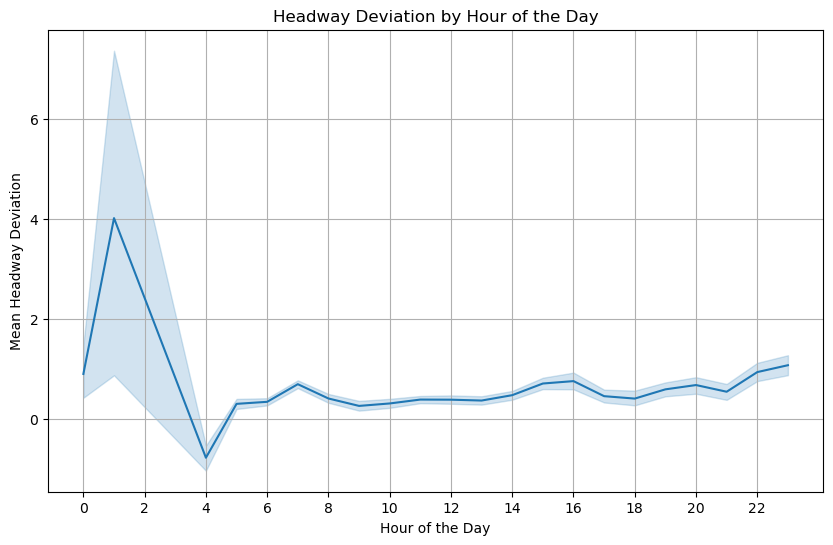

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# 1. Headway Deviation by Hour of the Day
plt.figure(figsize=(10, 6))
sns.lineplot(x=wego['HOUR_OF_DAY'], y=wego['HDWY_DEV'])
plt.title("Headway Deviation by Hour of the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Mean Headway Deviation")
plt.xticks(range(0, 24, 2))  # Show every other hour
plt.grid(True)
plt.show()

# 2. On-Time Performance by Hour of the Day (Stacked Bar Plot)
on_time_data_by_hour = wego[['HOUR_OF_DAY', 'ADJUSTED_ONTIME_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_EARLY_COUNT']]
on_time_data_by_hour.set_index('HOUR_OF_DAY', inplace=True)
on_time_data_by_hour.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("On-Time Performance by Hour of the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



In [ ]:
# Group by 'OPERATOR' and 'HOUR_OF_DAY' to count the number of trips per operator per hour
buses_per_operator_hour = wego.groupby(['OPERATOR', 'HOUR_OF_DAY']).size().unstack(fill_value=0)

# Plot the stacked bar chart showing count of trips per hour, stacked by operators
buses_per_operator_hour.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Count of Buses per Operator per Hour of Day (Stacked by Operator)")
plt.xlabel("Hour of the Day")
plt.ylabel("Count of Buses")
plt.xticks(rotation=45)
plt.legend(title="Operator")
plt.grid(True)
plt.show()



Lets get a count of busses on the road per hour. I want to divide hour headway count per hour by that to determine what hours need more or less busses?

In [ ]:
bus count 

In [ ]:
bus count per hour

In [ ]:
bus count per hour per headway

Turns out overload id is the id for when another bus is dispatched when a route needs another bus. lets count that and determine when they generally correctly assign these overload buses
